<a href="https://colab.research.google.com/github/Matheus-Homem/churn-project/blob/main/Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Project 01] - Telco Customer Churn

## Context

**"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."** 

    [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

### Customers who left within the last month:
- The column is called **Churn**;

###  Services that each customer has signed up for:
- **PhoneService**: Whether the customer has a phone service or not (Yes, No);
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service);
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No);
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service);
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service);
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service);
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service);
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service);
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service);

### Customer account information:
- **tenure**: Number of months the customer has stayed with the company;
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year);
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic));
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No);
- **MonthlyCharges**: The amount charged to the customer monthly;
- **TotalCharges**: The total amount charged to the customer;

### Demographic info about customers:
- **gender**: Whether the customer is a male or a female;
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0);
- **Partner**: Whether the customer has a partner or not (Yes, No);
- **Dependents**: Whether the customer has dependents or not (Yes, No);

## Overview
1. **Imports**


2. **Data Cleaning**
    - NA Processing;
    - Outliers Processing;
    
    
3. **Exploratory Data Analysis (EDA)**
    - Variable Filtering;
    - Feature Engineering;
    - Hypothesis Validation;
    - Univariate, Bivariate and Multivariate Analysis;


4. **Modeling**
    - Categorical Data Encoding;
    - Data Transformation;
    - Data Rescaling;
    - Data Standardization;
    - Data Balancing;??
    - Feature Selection;
    
    
5. **Machine Learning Algorithms**
    - Recommendation System;
    - 
    
    
6. **Performance Metrics**
    - Recommendation System Metrics;
    - 
    - Business Impact;

## 1. Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/Matheus-Homem/churn-project/main/data/Telco-Customer-Churn.csv')

In [2]:
sns.set_style("darkgrid")

## 2. Data Cleaning

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

### 2.1 NA Processing

In [ ]:
# There is apparently no missing data in this dataset;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- But we can observe that the TotalCharges variable (The total amount charged to the customer) has a Dtype = object when it should be a continuous variable. Let's take a closer look and try to convert this column to numerical:

In [ ]:
print("TotalCharges variable have {} unique values.".format(df['TotalCharges'].nunique()))

TotalCharges variable have 6531 unique values.


In [ ]:
# Looks like there's a string in the TotalCharges column;
df['TotalCharges'].value_counts().head()

         11
20.2     11
19.75     9
20.05     8
19.9      8
Name: TotalCharges, dtype: int64

In [ ]:
# Because the quantity is low (11), we can just delete the lines with the empty string and then transform the variable;
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df = df[df['TotalCharges']!=' ']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### 2.2 Outliers Processing

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:>

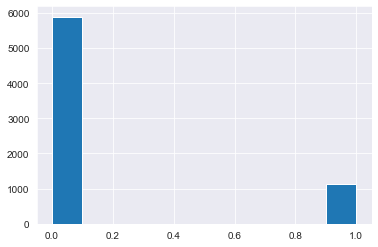

In [ ]:
# SeniorCitizen is a categorical variable with numerical dtype
df['SeniorCitizen'].hist()

<AxesSubplot:xlabel='tenure'>

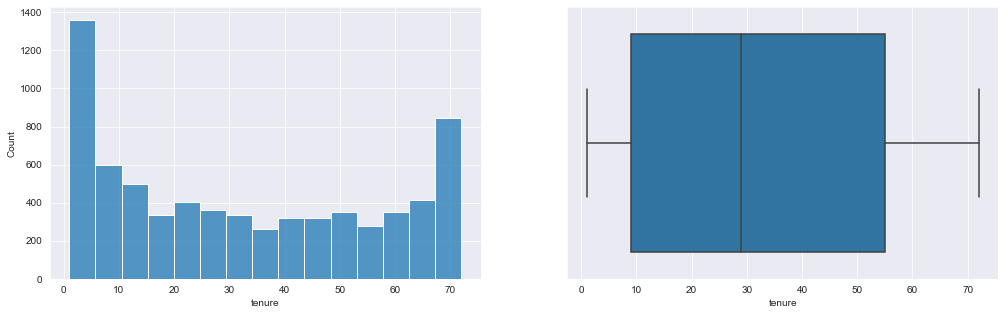

In [ ]:
# Tenure variable does not have any visible outliers
fig, axes = plt.subplots(1,2,figsize=(17,5))
sns.histplot(x='tenure',data=df,ax=axes[0])
sns.boxplot(x='tenure',data=df,ax=axes[1])

<AxesSubplot:xlabel='MonthlyCharges'>

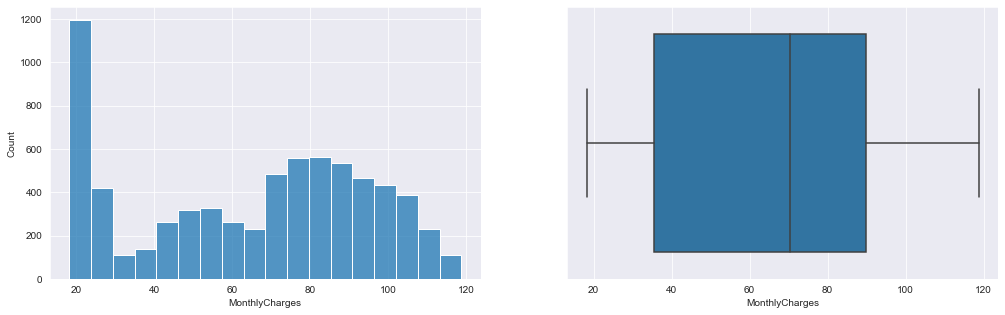

In [ ]:
# MonthlyCharges variable also does not have any visible outliers
fig, axes = plt.subplots(1,2,figsize=(17,5))
sns.histplot(x='MonthlyCharges',data=df,ax=axes[0])
sns.boxplot(x='MonthlyCharges',data=df,ax=axes[1])

<AxesSubplot:xlabel='TotalCharges'>

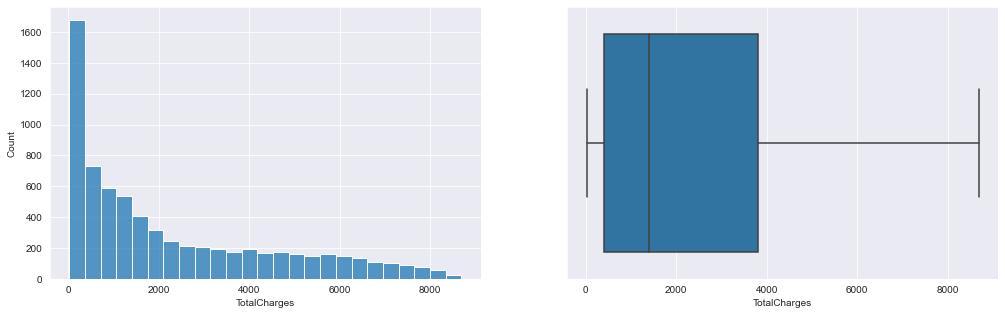

In [ ]:
# TotalCharges variable also does not have any visible outliers
fig, axes = plt.subplots(1,2,figsize=(17,5))
sns.histplot(x='TotalCharges',data=df,ax=axes[0])
sns.boxplot(x='TotalCharges',data=df,ax=axes[1])

## 3. Exploratory Data Analysis (EDA)
### 3.1 Variable Filtering

In [ ]:
print('The customerID column has {} unique values, meaning 1 value for each individual column.\nBecause of this we are going to drop it.'.format(df['customerID'].nunique()))
df.drop('customerID',axis=1,inplace=True)
df.shape

The customerID column has 7032 unique values, meaning 1 value for each individual column.
Because of this we are going to drop it.


(7032, 20)

### 3.2 Univariate Analysis

In [ ]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
cat = ['Churn','gender','Partner','Dependents',
       'PhoneService','MultipleLines','PaymentMethod','PaperlessBilling',
       'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract']

#### No Phone/Internet Service

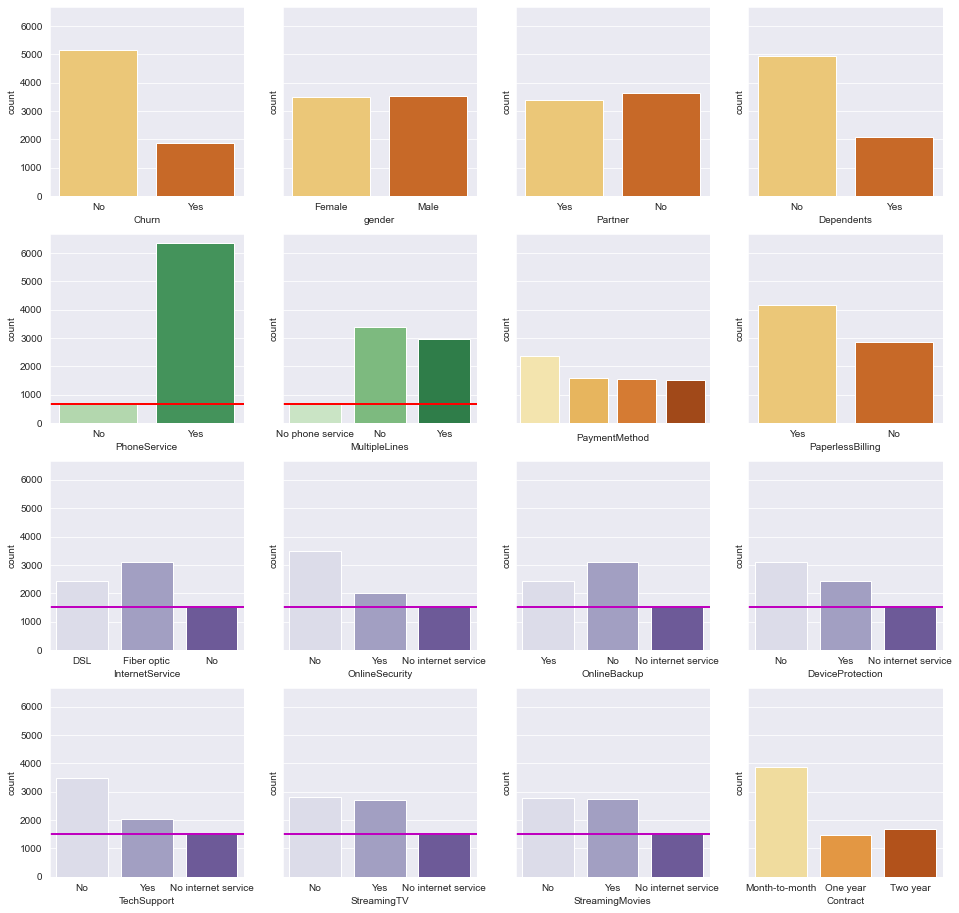

In [ ]:
fig, axes = plt.subplots(4,4,figsize=(16,16),sharey=True)

No_Int_Serv = df['InternetService'].value_counts().loc['No']

No_Phone_Serv = df['PhoneService'].value_counts().loc['No']

i = 0
for row in range(4):
    for column in range(4):
        if i in [0,1,2,3,7,15]:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='YlOrBr')
        elif i==6:
            g = sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='YlOrBr')
            axes[row,column].set_xticklabels('')         
        elif i in [4,5]:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Greens')
            axes[row,column].axhline(y=No_Phone_Serv,linewidth=2, color='r')
        else:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Purples')
            axes[row,column].axhline(y=No_Int_Serv,linewidth=2, color='m')
        i += 1

In [ ]:
df[['PhoneService','MultipleLines']].value_counts()

PhoneService  MultipleLines   
Yes           No                  3385
              Yes                 2967
No            No phone service     680
dtype: int64

In [ ]:
df[df['InternetService']=='No'][['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].value_counts()

OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies    
No internet service  No internet service  No internet service  No internet service  No internet service  No internet service    1520
dtype: int64

- As we can see above, in the **680 times that the Phone Service variable is "No"**, the MultipleLines variable will be "No Phone Service"; 
- The same goes for the **1520 times InternetService column is "No"**, the 6 variables that have "No Internet Service" as a value will be "No Internet Service";
- This may seem obvious but it will be of great importance in the part of **feature engineering**; 

### 3.3 Bivariate Analysis

#### Tenure x Contract

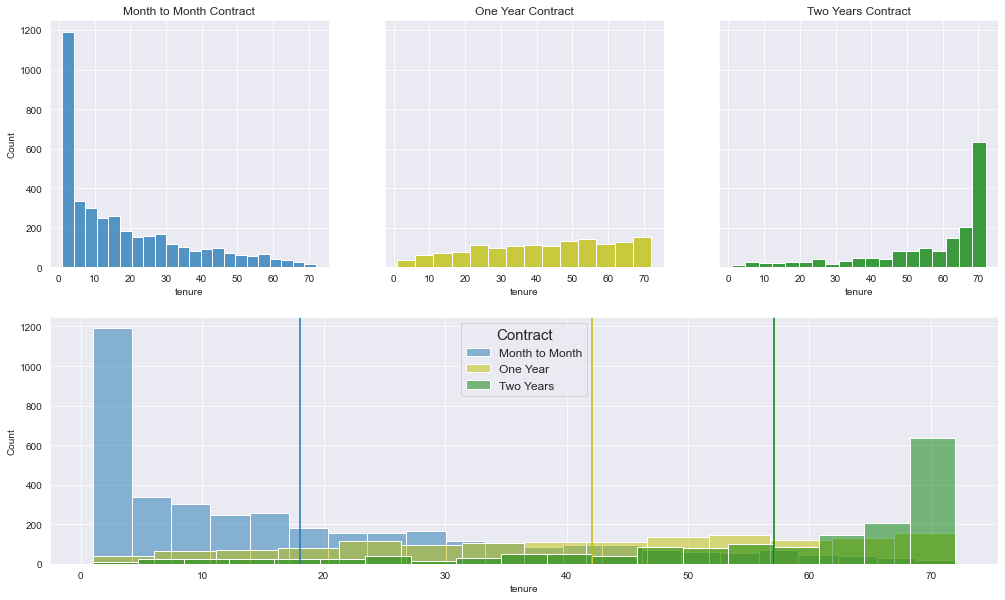

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(17,10),sharey=True)
gs = axes[0, 1].get_gridspec()
for ax in axes[1,:3]:
    ax.remove()
axbig = fig.add_subplot(gs[1, :3])

sns.histplot(x='tenure',data=df[df['Contract']=='Month-to-month'],ax=axes[0,0])
axes[0,0].set_title('Month to Month Contract')
sns.histplot(x='tenure',data=df[df['Contract']=='One year'],ax=axes[0,1],color='y')
axes[0,1].set_title('One Year Contract')
sns.histplot(x='tenure',data=df[df['Contract']=='Two year'],ax=axes[0,2],color='g')
axes[0,2].set_title('Two Years Contract')

MtM_mean = df[df['Contract']=='Month-to-month']['tenure'].mean()
OY_mean = df[df['Contract']=='One year']['tenure'].mean()
TY_mean = df[df['Contract']=='Two year']['tenure'].mean()

sns.histplot(x='tenure',data=df[df['Contract']=='Month-to-month'],ax=axbig,alpha=0.5,label='Month to Month')
sns.histplot(x='tenure',data=df[df['Contract']=='One year'],ax=axbig,color='y',alpha=0.5,label='One Year')
sns.histplot(x='tenure',data=df[df['Contract']=='Two year'],ax=axbig,color='g',alpha=0.5,label='Two Years')
axbig.legend(loc=9,fontsize=12,title="Contract",title_fontsize=15)
plt.axvline(x=MtM_mean)
plt.axvline(x=OY_mean,color='y')
plt.axvline(x=TY_mean,color='g')

- From the graphics above, we can see that customers who pay **Month-to-Month tend to stay less** in the company, and customers who pay for **Two Years of service tend to stay more**.
- Each vertical line represents the **mean** of the distribution;

#### Churn Behavior in MonthlyCharges vs. TotalCharges

Text(0.5, 1.0, 'MonthlyCharges x Tenure')

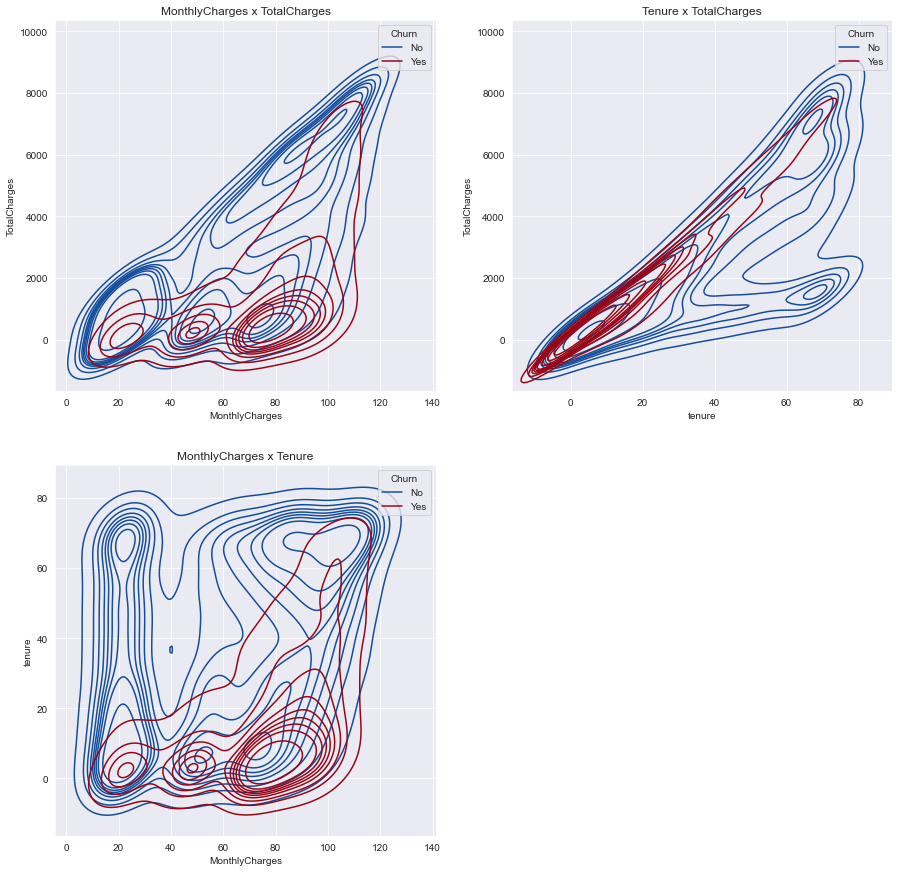

In [ ]:
colors = ["#134D9C", "#990515"]

fig, axes = plt.subplots(2,2,figsize=(15,15))
axes[1,1].remove()

sns.kdeplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',palette=sns.color_palette(colors),ax=axes[0,0]).set_title('MonthlyCharges x TotalCharges')

sns.kdeplot(data=df,x='tenure',y='TotalCharges',hue='Churn',palette=sns.color_palette(colors),ax=axes[0,1]).set_title('Tenure x TotalCharges')

sns.kdeplot(data=df,x='MonthlyCharges',y='tenure',hue='Churn',palette=sns.color_palette(colors),ax=axes[1,0]).set_title('MonthlyCharges x Tenure')

- Through the **MonthlyCharges x TotalCharges** graph, we can see that the highest concentration of churns are customers who **pay more monthly** and less in total, while people who "follow a line" of **increasing Monthly Charges proportional** to the increase in totalcharges do not frequently occurs churn;


- According to the graph of **Tenure x Total Charges**, the greatest concentration of churns is when customers have a **low Total Charge and also a low time spent in the company**. In addition it is possible to **observe a linearity** in the data where the churn occurs;


- In the last graph (**MonthlyCharges x Tenure**), there is a great correlation of the **occurrence of churn** and when the data of **MonthlyCharges are at their highest values and the length of stay the company is low**;

### 3.3 Feature Engineering

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### The Internet Service Analysis

In [ ]:
# let's start by checking the columns that appear to have only yes or no values;
df[['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
    'StreamingMovies','PaperlessBilling','Churn']].nunique()

Partner             2
Dependents          2
PhoneService        2
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
PaperlessBilling    2
Churn               2
dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

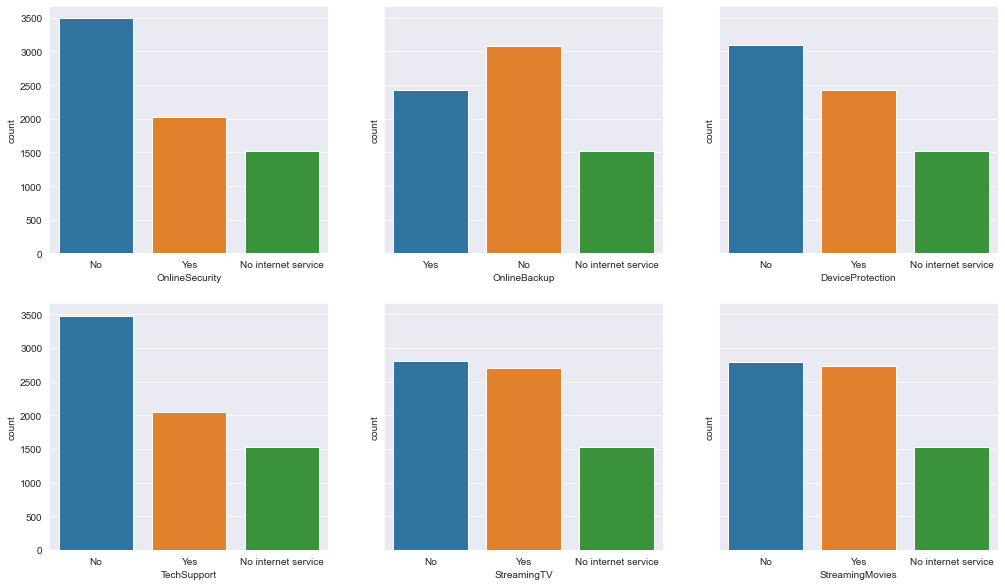

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(17,10),sharey=True)

sns.countplot(x='OnlineSecurity',data=df,ax=axes[0,0])
sns.countplot(x='OnlineBackup',data=df,ax=axes[0,1])
sns.countplot(x='DeviceProtection',data=df,ax=axes[0,2])
sns.countplot(x='TechSupport',data=df,ax=axes[1,0])
sns.countplot(x='StreamingTV',data=df,ax=axes[1,1])
sns.countplot(x='StreamingMovies',data=df,ax=axes[1,2])

As you can see, it appears that all the 6 variables which got 3 variables *(yes, no, no internet service)* have the same amout of "*no internet service*", let's see if this information checks:

In [ ]:
print(df[df['OnlineSecurity']=='No internet service'][['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].nunique())
df[df['OnlineSecurity']=='No internet service'][['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].head(10)

OnlineSecurity      1
OnlineBackup        1
DeviceProtection    1
TechSupport         1
StreamingTV         1
StreamingMovies     1
dtype: int64


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
16,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
21,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
22,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
33,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
42,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
58,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
68,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
71,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
73,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


Due to this characteristic of the dataset, we are going to create a column that will contain information about the lack of internet service. This new column will serve as a dummy for all 6 columns listed above, now we will only need 1 other dummy for each dataset (this reduces the final number of columns by 5);

In [ ]:
df['InternetService'] = df['OnlineSecurity'].apply(lambda x: 1 if x=="No internet service" else 0)

In [ ]:
# Every time InternetService is 1: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
# StreamingTV, StreamingMovies is "No internet service"
df[['InternetService','TechSupport']].value_counts()

InternetService  TechSupport        
0                No                     3473
                 Yes                    2044
1                No internet service    1526
dtype: int64

Now we can transform the 6 columns with 3 values to 6 columns with "1" when value=="No"(could also be "Yes") and 0 in the rest.

In [ ]:
def NoToOne(lista):
    for i in range(len(lista)):
        df[lista[i]] = df[lista[i]].apply(lambda x: 1 if x=="No" else 0)
NoToOne(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

#### Dual Variable Categorical Columns

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,0,1,0,1,1,1,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,0,0,1,0,1,1,1,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,0,0,0,1,1,1,1,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,0,0,1,0,0,1,1,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,0,1,1,1,1,1,1,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Now we only got 6 variables with only two categories (and in 5 of them the variables are yes or no)
df[['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
PaperlessBilling    2
Churn               2
dtype: int64

In [ ]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
# Now we must replace one of the genders with 1 and the other with 0
df['gender'] = df['gender'].apply(lambda x: 1 if x=="Female" else 0)

In [ ]:
#For the rest of the variables we will use the same function that was created and used previously
NoToOne(['Partner','Dependents','PhoneService','PaperlessBilling','Churn'])

#### The Remeaning Object dtype Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Let's take a look in these 4 object columns
df[['MultipleLines','Contract','PaymentMethod','TotalCharges']].head()

,MultipleLines,Contract,PaymentMethod,TotalCharges
0,No phone service,Month-to-month,Electronic check,29.85
1,No,One year,Mailed check,1889.5
2,No,Month-to-month,Mailed check,108.15
3,No phone service,One year,Bank transfer (automatic),1840.75
4,No,Month-to-month,Electronic check,151.65


In [ ]:
df['TotalCharges'].value_counts().sort_values()

6218.45     1
394.1       1
2758.15     1
676.7       1
88.35       1
           ..
20.05       8
19.9        8
19.75       9
20.2       11
           11
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
# It seems like we have 11 missing values in the dataset in the column TotalCharges
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,0,0,0,1,No phone service,0,0,1,0,0,0,1,Two year,0,Bank transfer (automatic),52.55,,1
753,0,0,1,0,0,0,No,1,0,0,0,0,0,0,Two year,1,Mailed check,20.25,,1
936,1,0,0,0,0,0,No,0,0,0,0,1,0,0,Two year,1,Mailed check,80.85,,1
1082,0,0,0,0,0,0,Yes,1,0,0,0,0,0,0,Two year,1,Mailed check,25.75,,1
1340,1,0,0,0,0,1,No phone service,0,0,0,0,0,0,1,Two year,1,Credit card (automatic),56.05,,1
3331,0,0,0,0,0,0,No,1,0,0,0,0,0,0,Two year,1,Mailed check,19.85,,1
3826,0,0,0,0,0,0,Yes,1,0,0,0,0,0,0,Two year,1,Mailed check,25.35,,1
4380,1,0,0,0,0,0,No,1,0,0,0,0,0,0,Two year,1,Mailed check,20.00,,1
5218,0,0,0,0,0,0,No,1,0,0,0,0,0,0,One year,0,Mailed check,19.70,,1
6670,1,0,0,0,0,0,Yes,0,1,0,0,0,0,1,Two year,1,Mailed check,73.35,,1


In [ ]:
print('As there are only 11 missing rows and in all there are {} rows, we will delete the lines where TotalCharges is equal to " "'.format(df.shape[0]))
df = df[df['TotalCharges']!=' ']
df.shape

As there are only 11 missing rows and in all there are 7043 rows, we will delete the lines where TotalCharges is equal to " "


(7032, 20)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype('float64',copy=False)

In [ ]:
# Now we are left with these 3 object columns;
df[['MultipleLines','Contract','PaymentMethod']].head()

,MultipleLines,Contract,PaymentMethod
0,No phone service,Month-to-month,Electronic check
1,No,One year,Mailed check
2,No,Month-to-month,Mailed check
3,No phone service,One year,Bank transfer (automatic)
4,No,Month-to-month,Electronic check


In [ ]:
# Let's check how many unique values there's in each column;
df[['MultipleLines','Contract','PaymentMethod']].nunique()

MultipleLines    3
Contract         3
PaymentMethod    4
dtype: int64

In [ ]:
# Seeing the data below, we can try to make a connection between the MultipleLines column and the PhoneService column;
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
df['PhoneService'].value_counts()

0    6352
1     680
Name: PhoneService, dtype: int64

In [ ]:
# Now we need to check if these 680 are the same 680 rows
df[df['PhoneService']==1]['MultipleLines'].nunique()

1

In [ ]:
# Confirmed this information, we can transform the MultipleLines column to a column where No (or Yes) is 1 and the rest is 0
NoToOne(['MultipleLines'])

For the remaining 2 columns we are going to use the **get_dummies** method from Pandas

In [ ]:
Contract = pd.get_dummies(df['Contract'],drop_first=True)
Contract

,One year,Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [ ]:
PaymentMethod = pd.get_dummies(df['PaymentMethod'],drop_first=True)
PaymentMethod

,Credit card (automatic),Electronic check,Mailed check
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,0,1,0
7041,0,0,1


In [ ]:
df = pd.concat([df,PaymentMethod,Contract],axis=1)

In [ ]:
del [df['PaymentMethod'],df['Contract']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7032 non-null   int64  
 1   SeniorCitizen            7032 non-null   int64  
 2   Partner                  7032 non-null   int64  
 3   Dependents               7032 non-null   int64  
 4   tenure                   7032 non-null   int64  
 5   PhoneService             7032 non-null   int64  
 6   MultipleLines            7032 non-null   int64  
 7   InternetService          7032 non-null   int64  
 8   OnlineSecurity           7032 non-null   int64  
 9   OnlineBackup             7032 non-null   int64  
 10  DeviceProtection         7032 non-null   int64  
 11  TechSupport              7032 non-null   int64  
 12  StreamingTV              7032 non-null   int64  
 13  StreamingMovies          7032 non-null   int64  
 14  PaperlessBilling        

In [ ]:
df = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 
       'Credit card (automatic)', 'Electronic check', 'Mailed check',
       'One year', 'Two year','Churn']]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Credit card (automatic),Electronic check,Mailed check,One year,Two year,Churn
0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,0,29.85,29.85,0,1,0,0,0,1
1,0,0,1,1,34,0,1,0,0,1,0,1,1,1,1,56.95,1889.50,0,0,1,1,0,1
2,0,0,1,1,2,0,1,0,0,0,1,1,1,1,0,53.85,108.15,0,0,1,0,0,0
3,0,0,1,1,45,1,0,0,0,1,0,0,1,1,1,42.30,1840.75,0,0,0,1,0,1
4,1,0,1,1,2,0,1,0,1,1,1,1,1,1,0,70.70,151.65,0,1,0,0,0,0
